# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from xgboost import XGBRegressor
from hyperopt import hp,Trials,fmin,tpe,STATUS_OK

# Loading Dataset

In [3]:
df = pd.read_csv(r'C:\Programacion\Datasets\HotelReservations\Hotel Reservations.csv')

In [7]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [4]:
df.drop(['Booking_ID'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

# Cleaning

In [9]:
#duplicates
df.duplicated().sum()

0

In [10]:
#InvalidValues
for col in df.select_dtypes('object').columns:
    print(df[col].value_counts(),end='\n\n')

INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: Booking_ID, Length: 36275, dtype: int64

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64



In [12]:
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

# EDA

In [5]:
sns.set_style('darkgrid')

In [9]:
df.no_of_adults.mean(),df.no_of_adults.median()

(1.8449620951068229, 2.0)

In [10]:
df.no_of_adults.std()

0.5187148379013653

In [11]:
df.no_of_children.mean(),df.no_of_children.median()

(0.10527911784975878, 0.0)

In [13]:
df.no_of_children.value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

Text(0.5, 0.98, 'Conteo')

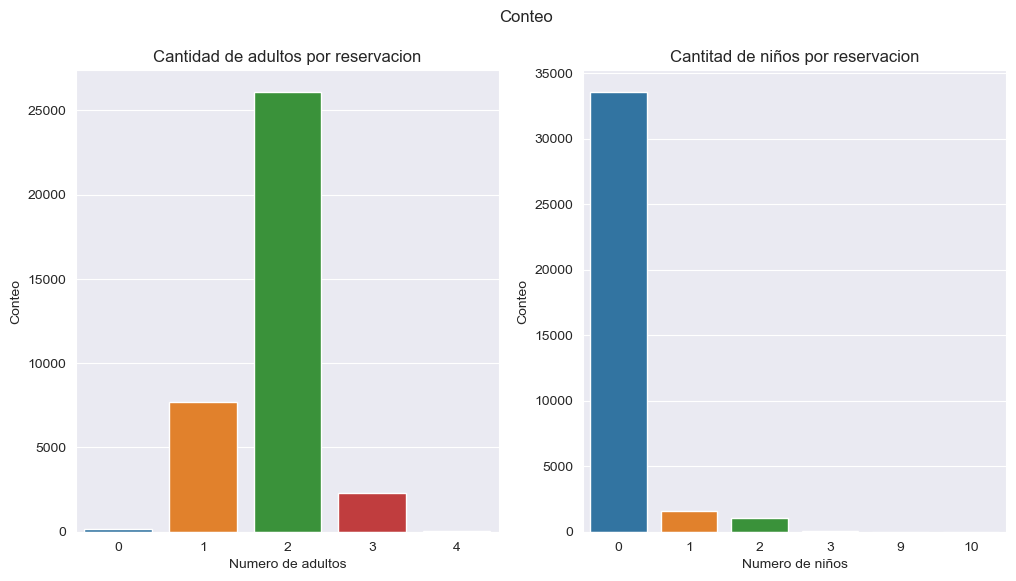

In [14]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.countplot(x=df.no_of_adults,ax=ax[0])
ax[0].set_title('Cantidad de adultos por reservacion')
ax[0].set_xlabel('Numero de adultos')
ax[0].set_ylabel('Conteo')

sns.countplot(x=df.no_of_children,ax=ax[1])
ax[1].set_title('Cantitad de niños por reservacion')
ax[1].set_xlabel('Numero de niños')
ax[1].set_ylabel('Conteo')

fig.suptitle('Conteo')

<Axes: title={'center': 'Cantidad de niños segun el tipo de plan de comida'}, xlabel='Tipo de plan de comida', ylabel='Conteo'>

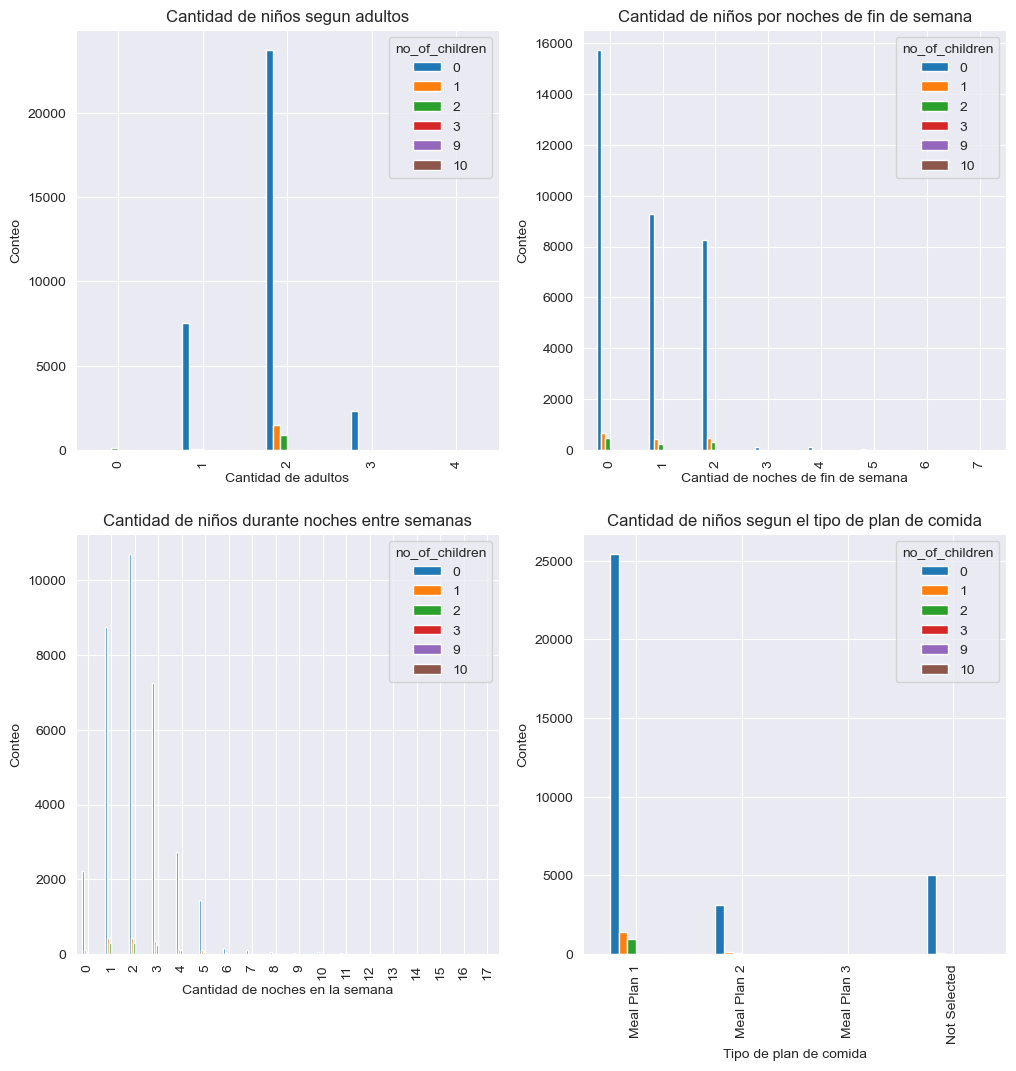

In [32]:
fig0,ax0 = plt.subplots(2,2,figsize=(12,12))
df.groupby('no_of_adults')['no_of_children'].value_counts().unstack(fill_value=0).plot.bar(xlabel='Cantidad de adultos',
                                                                                          ylabel='Conteo',
                                                                                          title='Cantidad de niños segun adultos',
                                                                                          ax=ax0[0,0])
df.groupby('no_of_weekend_nights')['no_of_children'].value_counts().unstack(fill_value=0).plot.bar(ax=ax0[0,1],
                                                                                                  xlabel='Cantiad de noches de fin de semana',
                                                                                                  ylabel='Conteo',
                                                                                                  title='Cantidad de niños por noches de fin de semana')
df.groupby('no_of_week_nights')['no_of_children'].value_counts().unstack(fill_value=0).plot.bar(ax=ax0[1,0],
                                                                                               xlabel='Cantidad de noches en la semana',
                                                                                               ylabel='Conteo',
                                                                                               title='Cantidad de niños durante noches entre semanas')
df.groupby('type_of_meal_plan')['no_of_children'].value_counts().unstack(fill_value=0).plot.bar(ax=ax0[1,1],
                                                                                               xlabel='Tipo de plan de comida',
                                                                                               ylabel='Conteo',
                                                                                               title='Cantidad de niños segun el tipo de plan de comida')



Text(0.5, 1.0, 'Conteo de la clase binaria(target)')

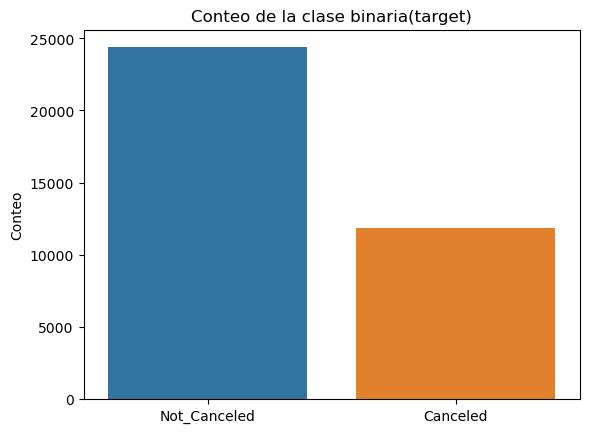

In [15]:
sns.countplot(x=df.booking_status)
plt.xlabel('')
plt.ylabel('Conteo')
plt.title('Conteo de la clase binaria(target)')